In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
N, D, H= 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))
h= tf.maximum(tf.matmul(x,w1), 0)
y_pred = tf.matmul(h, w2)
loss = tf.losses.mean_squared_error(y_pred, y)
optimizer = tf.train.GradientDescentOptimizer(1e-5)
updates = optimizer.minimize(loss)

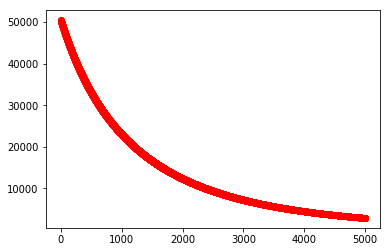

50459.395 2882.3003


In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D), y: np.random.randn(N , D),}
    loss_summary=[]
    step=5000
    for i in range(step):
        out=sess.run([loss, updates], feed_dict = values)
        loss_val,_ = out
        loss_summary.append(loss_val)
    plt.plot(range(step), loss_summary, 'ro', label='loss_val')
    plt.show()
    print(loss_summary[0],loss_summary[step-1])